In [2]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 1.0 MB/s eta 0:00:00


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz  
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr  
!make 
!make install  
!pip install Ta-Lib

In [4]:
# Numpy のアップグレード
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


ランタイムを再起動してください

In [1]:
# 環境変数を設定
!echo 'export LD_LIBRARY_PATH=/usr/lib' >> ~/.bashrc
!source ~/.bashrc

In [6]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [2]:
import mplfinance as mpf
import datetime as dt
import talib as ta

<ipython-input-7-3f052cb08223>:21: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


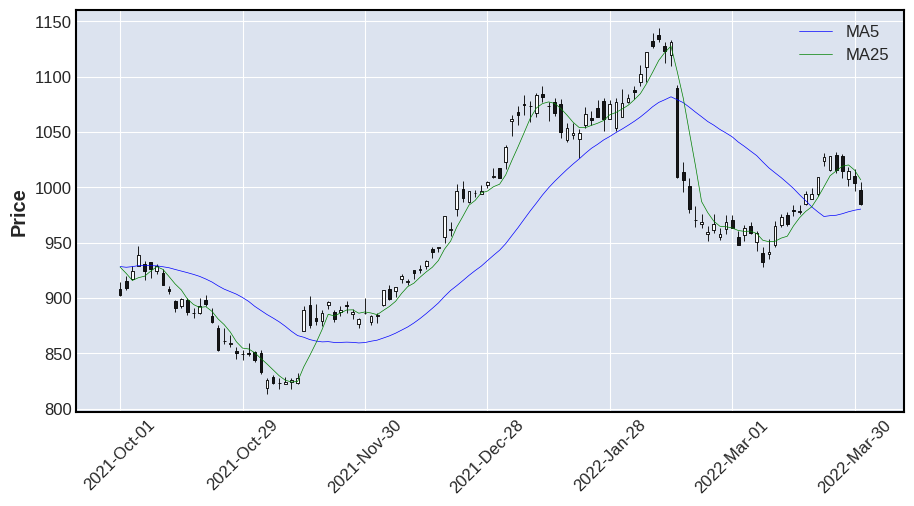

In [7]:
df = get_stock_data(7182)   # ゆうちょ銀行
close = df["Close"]

# 25日移動平均線
df["ma25"]  = ta.SMA(close, 25)
# 5日移動平均線
df["ma5"]  = ta.SMA(close, 5)

# 2021.10.1から2022.3.31までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,3,31)]
apd  = {
        # 5日移動平均線
        "MA5": mpf.make_addplot(cdf["ma25"], color="blue", width=0.5), 
        # 25日移動平均線
        "MA25": mpf.make_addplot(cdf["ma5"], color="green", width=0.5)
      }

# ラベルをつけてチャートを表示
fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
fig.show()

<ipython-input-8-09151401c5a5>:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


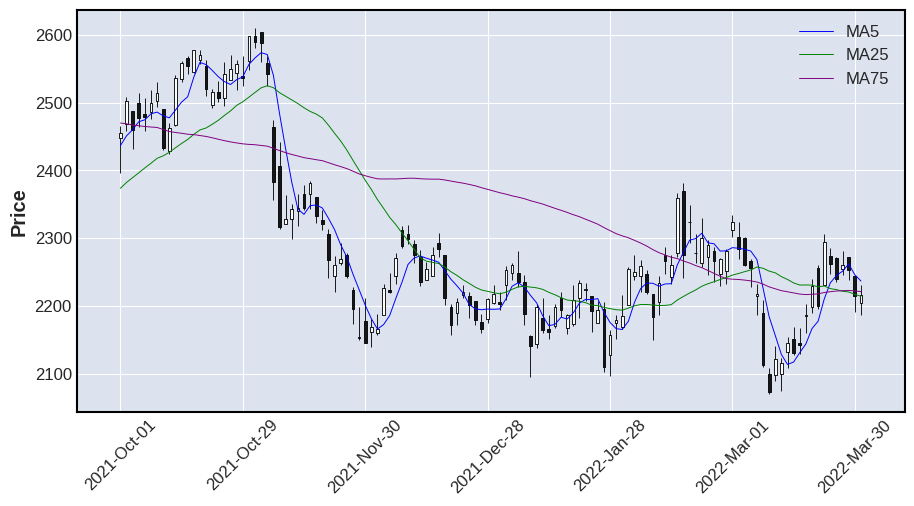

In [8]:
df = get_stock_data(9783)   # ベネッセホールディングス
close = df["Close"]

# 移動平均
df["ma5"]  = ta.SMA(close, 5)
df["ma25"]  = ta.SMA(close, 25)
df["ma75"]  = ta.SMA(close, 75)

# 2021.10.1から2022.3.31までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,3,31)]
apd  = {
          # 5日移動平均線
          "MA5": mpf.make_addplot(cdf["ma5"], color="blue", width=0.7),
          # 25日移動平均線
          "MA25": mpf.make_addplot(cdf["ma25"], color="green", width=0.7),
          # 75日移動平均線
          "MA75": mpf.make_addplot(cdf["ma75"], color="purple", width=0.7)
        }

fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
fig.show()

<ipython-input-9-faa096b8a575>:26: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


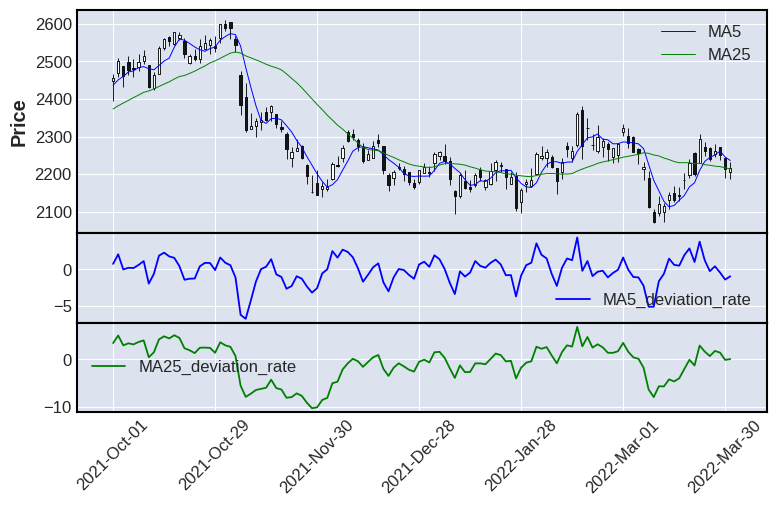

In [9]:
df = get_stock_data(9783)   # ベネッセホールディングス
close = df["Close"]

# 移動平均
df["ma5"]  = ta.SMA(close, 5)
df["ma25"]  = ta.SMA(close, 25)

# 乖離率
df["ma5_deviation_rate"] = (close - df["ma5"]) / df["ma5"] * 100
df["ma25_deviation_rate"] = (close - df["ma25"]) / df["ma25"] * 100

# 2021.10.1から2022.3.31までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,3,31)]
apd  = {
          # 移動平均線
          "MA5": mpf.make_addplot(cdf["ma5"], color="blue", panel=0, width=0.7),
          "MA25": mpf.make_addplot(cdf["ma25"], color="green", panel=0, width=0.7),
           # 5日移動平均乖離率
          "MA5_deviation_rate": mpf.make_addplot(cdf["ma5_deviation_rate"], color="blue", panel=1),
          # 25日移動平均乖離率
          "MA25_deviation_rate": mpf.make_addplot(cdf["ma25_deviation_rate"], color="green", panel=2)
      }

fig, axes = mpf.plot(cdf, type="candle", figratio=(5,3), addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
axes[2].legend(["MA5_deviation_rate"])
axes[4].legend(["MA25_deviation_rate"])
fig.show()

<ipython-input-10-b37bf53fd115>:33: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


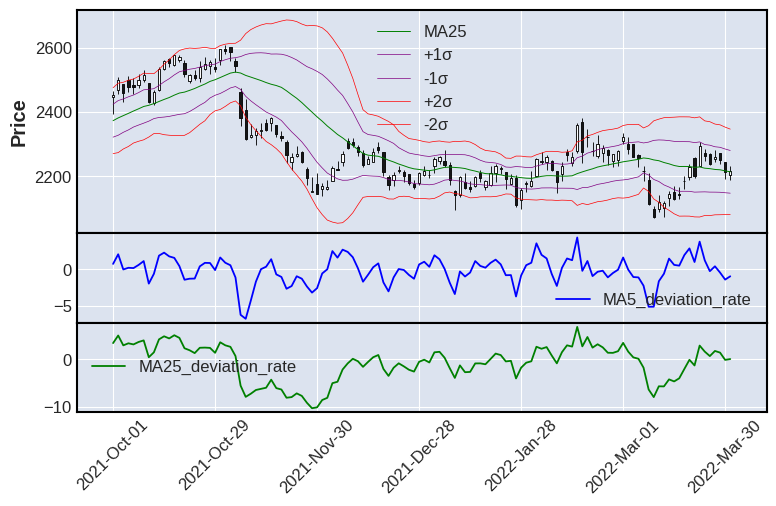

In [10]:
df = get_stock_data(9783) # ベネッセホールディングス
close = df['Close']

df['ma5'] = close.rolling(window=5).mean()
df['ma25'] = close.rolling(window=25).mean()

# 乖離率
df['ma5_deviation_rate'] = (close - df['ma5']) / df['ma5'] * 100
df['ma25_deviation_rate'] = (close - df['ma25']) / df['ma25'] * 100

# ボリンジャーバンド　±1σ　±2σ
df["upper1"], _, df["lower1"] = ta.BBANDS(close, timeperiod=25, nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
df["upper2"], _, df["lower2"] = ta.BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)

# 2021.10.1から2022.3.31までのチャートを作成
cdf = df[dt.datetime(2021,10,1):dt.datetime(2022,3,31)]
apd  = {
          # MA25
          "MA25": mpf.make_addplot(cdf['ma25'], color='green', panel=0, width=0.7),
          # ボリンジャーバンド 
          "+1σ": mpf.make_addplot(cdf["upper1"], color="purple", width=0.5),
          "-1σ": mpf.make_addplot(cdf["lower1"], color="purple", width=0.5),
          "+2σ": mpf.make_addplot(cdf["upper2"], color="red", width=0.5), 
          "-2σ": mpf.make_addplot(cdf["lower2"], color="red", width=0.5),
          # 5日移動平均線乖離率
          "MA5_deviation_rate": mpf.make_addplot(cdf['ma5_deviation_rate'], color='blue', panel=1),
          # 25日移動平均線乖離率
          "MA25_deviation_rate": mpf.make_addplot(cdf['ma25_deviation_rate'], color='green', panel=2)
      }

fig, axes = mpf.plot(cdf, type="candle", figratio=(5,3), addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
axes[2].legend(["MA5_deviation_rate"])
axes[4].legend(["MA25_deviation_rate"])
fig.show()